# 1. 의사결정나무 개념

1.1. 의사결정나무의 장점을 서술하시오.

답) 기준을 생성해 샘플을 분류하고 분류된 집단의 성질을 통하여 추정하므로, 직관적이며 해석력이 높다. 

1.2. 의사결정나무의 단점을 서술하시오.

답) 표본에 따라 트리구조가 민감하게 반응하므로, 과적합 가능성이 있다. 

1.3. 트리의 최대 깊이(max_depth)가 커질때 우려되는 문제점을 서술하시오.

답) 트리 노드를 계속해서 만들 수 있으므로, overfitting 즉 과적합의 우려가 있다. 

# 2. 지니불순도와 엔트로피

2.1.맨 위쪽 부모 노드의 지니불순도 값을 구하시오.

![pro2.1](pic2_1.png)

답 ) 1 - {(41/120)^2 + (40/120)^2 + (39/120)^2)} = 0.66652777... = 0.667

2.2. 맨 위쪽 부모 노드의 entropy 값을 구하시오.

![nn](pic2_2.png)

답 ) - (410/668) * log2(410/668) - (258/668) * log2(258/668) = 0.96232184... = 0.962

# 3. 실습

boston housing.csv에 의사결정나무를 활용

In [1]:
import pandas as pd
df = pd.read_csv("boston_housing.csv")

In [2]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
data = df.copy().loc[:, ['crim', 'chas', 'tax', 'lstat', 'medv'] ]

In [4]:
data

,crim,chas,tax,lstat,medv
0,0.00632,0,296.0,4.98,24.0
1,0.02731,0,242.0,9.14,21.6
2,0.02729,0,242.0,4.03,34.7
3,0.03237,0,222.0,2.94,33.4
4,0.06905,0,222.0,5.33,36.2
...,...,...,...,...,...
501,0.06263,0,273.0,9.67,22.4
502,0.04527,0,273.0,9.08,20.6
503,0.06076,0,273.0,5.64,23.9
504,0.10959,0,273.0,6.48,22.0


3.1. feature와 target 나누시오.
feature들로 이루어진 데이터프레임을 t_features에 저장하고, target으로 이루어진 Series를 t_target에 저장하시오.


t_features = 

t_target = 

In [5]:
t_features = data.iloc[:,:-1]

t_target = data.iloc[:,-1]

In [6]:
t_features

,crim,chas,tax,lstat
0,0.00632,0,296.0,4.98
1,0.02731,0,242.0,9.14
2,0.02729,0,242.0,4.03
3,0.03237,0,222.0,2.94
4,0.06905,0,222.0,5.33
...,...,...,...,...
501,0.06263,0,273.0,9.67
502,0.04527,0,273.0,9.08
503,0.06076,0,273.0,5.64
504,0.10959,0,273.0,6.48


In [7]:
t_target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

3.2. sklearn을 활용하여 train셋: test셋 = 8:2 비율로 분리하시오. random_state = 2021로 지정하시오.

train_features, test_features , train_target, test_target에 각 데이터를 저장하시오.

In [8]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(t_features, t_target, 
                                                                            test_size=0.2, random_state=2021)

In [9]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

404
404
102
102



3.3.
DecisionTreeRegressor 모델(random_state = 2021)을 만들고,
train_features와 train_target을 이용해 모델을 fit하고 이를 tree_fit에 저장하세요


In [10]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=2021)
tree_fit = tree.fit(train_features, train_target)

In [11]:
tree_fit

DecisionTreeRegressor(random_state=2021)

### GridSearchCV로 최적 파라미터 찾기

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=2021))


param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 20, 30, 40, 50]
param_range3 = ['mse', 'mae'] 

param_grid = [{'decisiontreeregressor__max_depth': param_range1,
              'decisiontreeregressor__min_samples_leaf': param_range2,
              'decisiontreeregressor__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, 
                 scoring = 'neg_mean_squared_error', # Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= 1)

gs = gs.fit(train_features, train_target)

print(-gs.best_score_)
print(gs.best_params_)

28.454197812256172
{'decisiontreeregressor__criterion': 'mse', 'decisiontreeregressor__max_depth': 4, 'decisiontreeregressor__min_samples_leaf': 20}


3.4. 최적의 파라미터로 만든 모델 best_tree에 저장하고,이를 train_features 와 train_target 에 대해 fit 하세요

In [15]:
best_tree = gs.best_estimator_
best_tree.fit(train_features, train_target)

Pipeline(steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(criterion='mse', max_depth=4,
                                       min_samples_leaf=20,
                                       random_state=2021))])

In [16]:
best_tree_for_graph = DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=20, random_state = 2021)
best_tree_for_graph.fit(train_features, train_target)

DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=20,
                      random_state=2021)

In [17]:
y_pred = best_tree.predict(test_features)

In [18]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(test_target, y_pred))
print('MSE: %.3f' % mean_squared_error(test_target,y_pred))

R squared: 0.552
MSE: 28.644


In [19]:
import numpy as np
feature_names = train_features.columns.tolist()

In [23]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyparsing>=2.0.1 in c:\anaconda3\lib\site-packages (from pydotplus) (3.0.4)



In [24]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import os


dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          feature_names = feature_names,
                          out_file = None)





graph_best = graph_from_dot_data(dot_data_best)
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)


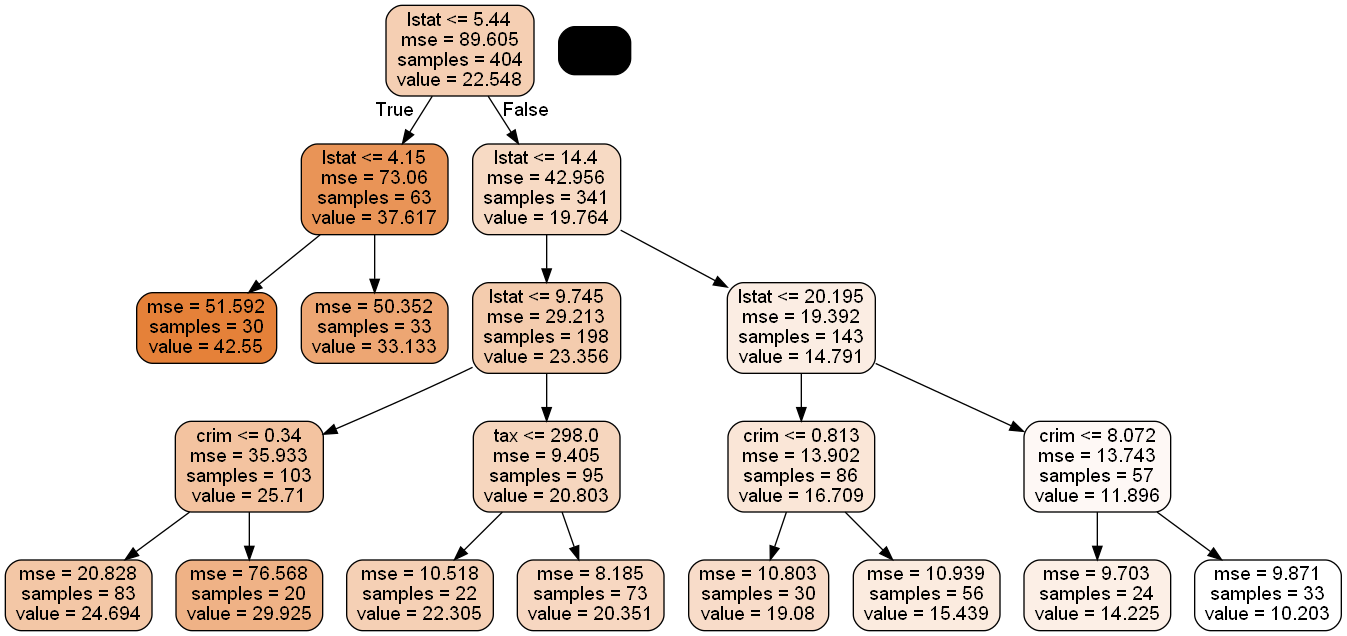

In [25]:
Image(dt_graph_best.create_png())

### feature importance 파악하기

In [26]:
# Feature Importance

import seaborn as sns
import matplotlib.pyplot as plt

feature_importance_values = best_tree_for_graph.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=train_features.columns)

3.5.중요도값 순 상위 5개의 값을 feature_top5에 저장하시오

In [30]:
feature_top5 = feature_importances.sort_values(ascending=False)[:5]

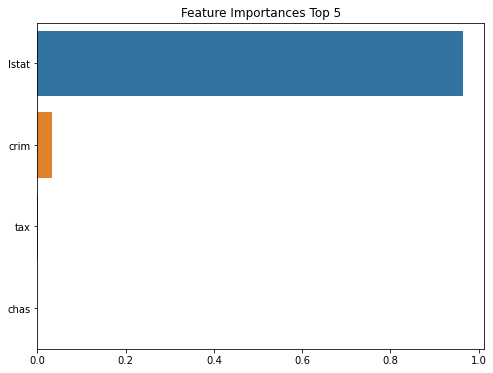

In [31]:
plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [32]:
feature_importances.sort_values(ascending=False)

lstat    0.963905
crim     0.033740
tax      0.002355
chas     0.000000
dtype: float64

3.6.이를 통해 알 수 있는 의사결정나무의 장점을 설명하세요.

-> feature의 중요도를 쉽게 알 수 있다.

(1) 시각화를 통해 분류 과정과 정보를 자세하게 알 수 있다. 

(2) 최대 깊이, 최소한의 sample 수등 여러 파라미터를 조정해, 과적합을 방지하고 정확도 높은 모델을 만들 수 있다. 

(3) feature의 중요도를 보고 피처를 선정해 간결하고 이상치에 강한 모델을 만들 수 있다. 